In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("1.ushape.csv")

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df.shape

(99, 3)

In [5]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [6]:
df = df.rename(columns={"3.159499363321345566e-02":"A", "9.869877579082642072e-01":"B", "0.000000000000000000e+00":"Class"})

In [7]:
df.columns

Index(['A', 'B', 'Class'], dtype='object')

In [8]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

<AxesSubplot: xlabel='A', ylabel='B'>

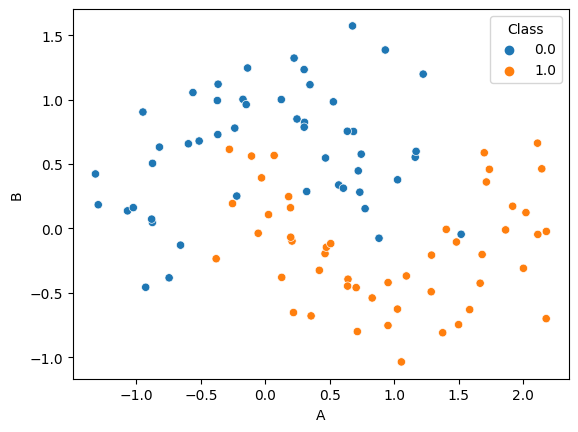

In [9]:
sns.scatterplot(x=df["A"], y=df["B"], hue=df["Class"])

In [10]:
clf = LogisticRegression().fit(X, y)
clf

LogisticRegression()

<AxesSubplot: >

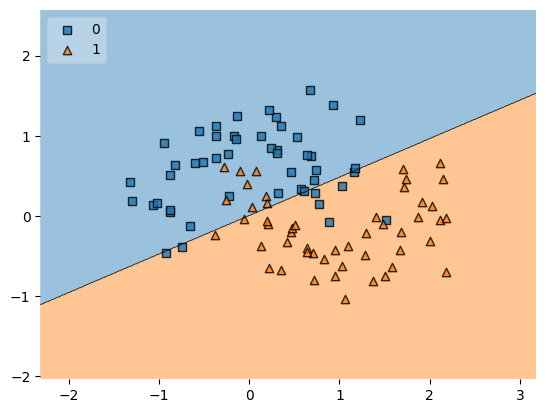

In [11]:
plot_decision_regions(X, y.astype("int"), clf, legend=2)

In [12]:
crv_score = cross_val_score(clf, X, y, scoring="accuracy", cv=10)
print("Cross Validation Score is: ", crv_score)
print("Mean of the cross validation score is: ", np.mean(crv_score))

Cross Validation Score is:  [0.9 0.8 0.8 0.7 0.7 0.7 1.  1.  0.7 1. ]
Mean of the cross validation score is:  0.8300000000000001


In [13]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_trf = poly.fit_transform(X)
clf1 = LogisticRegression().fit(X_trf, y)
crv_score_1 = cross_val_score(clf1, X_trf, y, scoring="accuracy", cv=10)
print("Cross Validation Score is: ", crv_score_1)
print("Mean of the cross validation score is: ", np.mean(crv_score_1))

Cross Validation Score is:  [0.9 0.8 0.8 0.8 1.  0.8 1.  1.  1.  1. ]
Mean of the cross validation score is:  0.9099999999999999
